# 15 min Intro to Persistent Homology
### <a href="https://ben300694.github.io/" target="_blank">Benjamin Matthias Ruppik</a>, Max-Planck Institute for Mathematics, Bonn

## Filtrations of topological spaces


### Motivating example: Sublevel filtrations

A lot of topological spaces $X$ come with a natural *filtration*,
an increasing union of subspaces $X_{i}$,
i.e. for $i < j$ in the index set we have $X_{i} \subseteq X_{j}$.

Here is an example of a topological space $X$
(with a Morse function $f \colon X \rightarrow \mathbb{R}$)
and the *sublevel set filtration*
$X_{r} = f^{-1}((-\infty, r])$:

<img src="img/surface_morse_position.jpg" width=400 title="Surface of genus 2 in Morse position with 3 minima, 7 saddles, 2 maxima"/>

### Persistent homology

The $i$-dimensional homology group of a space measures $i$-dimensional holes (or cavities).
$H_{i}(X)$ = $i$-dim cycles modulo boundaries

Here are some examples of 1-dimensional homology classes:

**TODO**

persist = to stick around for a long time

Example where a first homology class persists from its appearance until the end:

**TODO**

Example where a first homology class appears but then is cancelled at a maximum

**TODO**


Slogan: Persistent homology measures non-trivial cycles which can be detected in significant parts ofthe filtrations.

## Toy data and the Vietoris-Rips complex

### Defining a distance function


In [1]:
import pandas
import gudhi
from pylab import *

In [43]:
toy_matrix_2 = [[0,1,1,2,inf],
                [1,0,2,1,inf],
                [1,2,0,1,inf],
                [2,1,1,0,inf],
                [inf, inf, inf, inf, 0]]

**TODO: Picture of the graph**

### Applying persistent homology to the toy data

Vietoris-Rips filtration for $r \in \mathbb{R}$:
Insert a simplex for any finite set of vertices that has diameter at most $r$

In [11]:
graph_distance_matrix_2 = toy_matrix_2

# Build Vietoris-Rips complex

skeleton_2 = gudhi.RipsComplex(
    distance_matrix = graph_distance_matrix_2,
    max_edge_length = 5.0
)

Rips_simplex_tree_2 = skeleton_2.create_simplex_tree(max_dimension = 3)

for simplex in Rips_simplex_tree_2.get_filtration():
    print(simplex)

([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([0, 1], 1.0)
([0, 2], 1.0)
([1, 3], 1.0)
([2, 3], 1.0)
([1, 2], 2.0)
([0, 1, 2], 2.0)
([0, 3], 2.0)
([0, 1, 3], 2.0)
([0, 2, 3], 2.0)
([1, 2, 3], 2.0)
([0, 1, 2, 3], 2.0)


In [7]:
# Compute persistence of the simplex tree
BarCodes_Rips_2 = Rips_simplex_tree_2.persistence()

In [8]:
print(BarCodes_Rips_2)

[(1, (1.0, 2.0)), (0, (0.0, inf)), (0, (0.0, inf)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

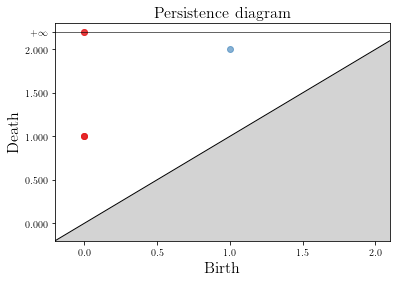

In [50]:
gudhi.plot_persistence_diagram(BarCodes_Rips_2)

## Persistent homology applied to "real data": Clique complex of a graph

Repository of various graphs https://networkrepository.com/index.php

<img src="img/network_repository_website.png" width=700 title="Screenshot of the Network Repositoy website"/>

Let us take a graph representing a social network:
 * each vertex represents a food-related facebook page
 * there is an edge between the vertices v and w whenever the pages mutually follow each other


The clique complex of any graph G is exactly a Vietoris–Rips complex for the metric space 
where the points are vertices of G and and the distances are the lengths of the shortest paths in G
This is also known as the flag complex of a graph.


In [26]:
def simplex_graph_from_csv(path_to_csv, delimiter=','):
    """
    Input: Path to csv file with list of edges
    
    Output: 1-skeleton of simplex tree
    """
    # Create a dataframe from csv
    dataframe = pandas.read_csv(path_to_csv, delimiter=delimiter, header=None)
    # User list comprehension to create a list of lists from Dataframe rows
    list_of_edges = [list(row) for row in dataframe.values]
    # Print list of lists i.e. rows
    print('Read the following list of edges:')
    print(list_of_edges)
    # Flatten edge list and remove duplicates to get list of vertices
    list_of_vertices = list(set([item for sublist in list_of_edges for item in sublist]))

    # Create simplex tree
    st = gudhi.SimplexTree()

    # Insert vertices into simplex tree
    for vertex in list_of_vertices:
        st.insert([vertex], 0.0)
    # Insert edges into simplex tree
    for edge in list_of_edges:
        st.insert(edge, 1.0)
        
    return st

Read the following list of edges:
[[0, 1], [1, 2], [2, 0], [2, 3], [3, 0], [4, 0]]
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([0, 1], 1.0)
([0, 2], 1.0)
([1, 2], 1.0)
([0, 3], 1.0)
([2, 3], 1.0)
([0, 4], 1.0)
[(1, (1.0, inf)), (1, (1.0, inf)), (0, (0.0, inf)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

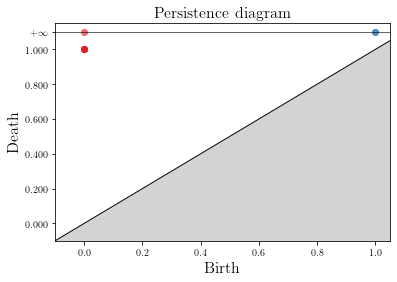

In [27]:
# Toy example working with the simplex tree
path_to_toy_csv = '/home/ben/git-source/jupyter-TDA/datasets/toy_graph.txt'

toy_st = simplex_graph_from_csv(path_to_toy_csv)

for simplex in toy_st.get_filtration():
    print(simplex)

toy_bar = toy_st.persistence(min_persistence=-1.0, persistence_dim_max=True)
print(toy_bar)

gudhi.plot_persistence_diagram(toy_bar)

In [30]:
# **TODO**: Import the real data graph and build Vietoris-Rips complex

path_to_fb_pages_food_csv = '/home/ben/git-source/jupyter-TDA/datasets/fb-pages-food/fb-pages-food.edges'

fb_pages_food_st = simplex_graph_from_csv(path_to_fb_pages_food_csv)

for simplex in fb-pages-food_st.get_filtration():
    print(simplex)

SyntaxError: cannot assign to operator (4222020271.py, line 3)

In [ ]:
toy_bar = toy_st.persistence(min_persistence=-1.0, persistence_dim_max=True)
print(toy_bar)

gudhi.plot_persistence_diagram(toy_bar)


## Conclusion

In [14]:
# Comparing different persistence diagrams using the bottleneck distance
#persistence_interval_dim_1_1 = Rips_simplex_tree_1.persistence_intervals_in_dimension(1)
#persistence_interval_dim_1_2 = Rips_simplex_tree_2.persistence_intervals_in_dimension(1)

#gudhi.bottleneck_distance(persistence_interval_dim_1_1, persistence_interval_dim_1_2)

### Properties of the data we could detect with persistent homology

 * qualitative data about large scale features
 * Measures both the global and local topology of a dataset
 * We can use the persitence data as input for further machine learning applications
 * **TODO**
 
 ### Drawbacks of using persistent homology
 * have to deal with noise in the data and stability
 * for example, points close to the diagonal in the persistence diagram only appear for a short time: these could come from random fluctuations in the data, but could also represent local properties
 * It can be challanging to interpret the meaning of the persistent homology groups for the application

## References

 * An introduction to Topological Data Analysis: fundamental and practical aspects for data scientists: https://arxiv.org/abs/1710.04019
 * Bot Detection on Social Networks Using Persistent Homology: https://www.semanticscholar.org/paper/Bot-Detection-on-Social-Networks-Using-Persistent-Nguyen-Aktas/e3944fac408415965b3d24d52d3ac7b7a0e9aa17
 * Persistent Homology of Collaboration Networks: https://www.hindawi.com/journals/mpe/2013/815035/
 
 
 
### Python libraries used

#### TDA tools

 * [GUDHI Python module](https://gudhi.inria.fr/)
 * https://github.com/GUDHI/TDA-tutorial

#### Graphs

 * https://networkx.org/



### Datasets
 
 @inproceedings{nr,
      title = {The Network Data Repository with Interactive Graph Analytics and Visualization},
      author={Ryan A. Rossi and Nesreen K. Ahmed},
      booktitle = {AAAI},
      url={https://networkrepository.com},
      year={2015}
 }
